Felker, Zachary: 95/100 
1.) No figure caption in exercise 3

# <font color = "red">Exercise 1:</font>

Create two 4x4 matrices and use Python and Numpy to perform a matrix multiplication. Confirm your result and show your work.

In [2]:
import numpy as np
foo = np.matrix('1 2 3 4; 5 6 7 2; 8 2 0 0; 0 3 9 0')
bar = np.matrix('1 2 3 4; 5 6 7 2; 8 2 0 0; 0 3 9 0')
print foo
print 'X'
print bar
print '='
print np.dot(foo, bar)
print ''
print 'To verify the upper left element: 1*1 + 5*2 + 8*3 + 0*4 = 35'
print 'The element below this: 1*5 + 5*6 + 8*7 + 0*2 = 91'

[[1 2 3 4]
 [5 6 7 2]
 [8 2 0 0]
 [0 3 9 0]]
X
[[1 2 3 4]
 [5 6 7 2]
 [8 2 0 0]
 [0 3 9 0]]
=
[[35 32 53  8]
 [91 66 75 32]
 [18 28 38 36]
 [87 36 21  6]]

To verify the upper left element: 1*1 + 5*2 + 8*3 + 0*4 = 35
The element below this: 1*5 + 5*6 + 8*7 + 0*2 = 91


# <font color = "red">Exercise 2:</font>

Write code to find <i>k</i> such that <b>fn(x)</b> converges (i.e., that by increasing <i>k</i>, the result no longer changes). 

In [1]:
import math
def fn(x, y):
    f = 1.0
    for k in range(1, y):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f

pi = 3.141592653

def findK(z):
    y = 1
    while fn(z,y) != fn(z,y+1):
        y += 1
    return y

print findK(pi/2.)
print findK(pi*5./2.)
print findK(pi*9./2.)

15
29
39


# <font color = "red">Exercise 3:</font>
 
Read in the image called <i>andromeda_rot.fits</i>. Make a side-by-side 2-panel figure. The left panel should show the 2D representation of the pixels along with isocontours. The right panel should show a 2D Gaussian fit to the pixel intensities (hint: go to the SciPy cookbook and search for 2D Gaussian). Make the labels be in arcseconds (not pixels). In order to switch from pixels to arcseonds, you will need to extract the image tick values and use the known fact that every pixel is 1.7 arcseconds (the resolution of the instrument).

**Extra Credit**: Re-do the Gaussian fit, but now solve for the rotation angle of the 2D Gaussian (i.e., the covariance).

Filename: andromeda_rot.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      53   (510, 340)   int16 (rescales to uint16)   


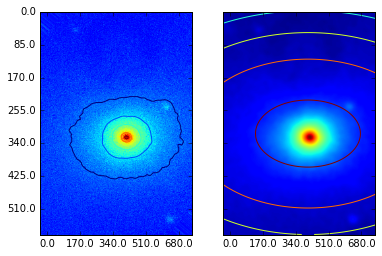

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
#root = '/u/home/christoq/Classes/Astro361/Fall2016/introduction/'
#sys.path.append('/u/home/christoq/Classes/Astro361/Fall2016/introduction/')
import numpy as np
from astropy.io import fits
from scipy import ndimage
from numpy import *
from scipy import optimize

def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = sqrt(abs((arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = sqrt(abs((arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: ravel(gaussian(*p)(*indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

#sys.path.append(root)
image = fits.info('andromeda_rot.fits')
data = fits.getdata('andromeda_rot.fits')
blurred_data = ndimage.gaussian_filter(data,sigma=3)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
ax1.imshow(data)
ax1.contour(blurred_data)
ax2.imshow(blurred_data)

params = fitgaussian(data)
fit = gaussian(*params)

ax2.contour(fit(*indices(data.shape))), cmap=cm.copper)


xlabel = ax1.get_xticks().tolist()
ylabel = ax1.get_yticks().tolist()
xlabel = [1.7*x for x in xlabel]
ylabel = [1.7*y for y in ylabel]
ax1.set_xticklabels(xlabel)
ax1.set_yticklabels(ylabel)

xlabel = ax2.get_xticks().tolist()
xlabel = [1.7*x for x in xlabel]
ax2.set_xticklabels(xlabel)

plt.show()

# <font color = "red">Exercise 5:</font>

Discuss how this tutorial enabled you to meet the 6 defined learning goals. For each goal, provide your own insight as to why it is important for modern astronomy.

Given that I've taken EECS 183 and spent the last year doing research with python, goals 1-5 were completed from the outset. I'm still not confident that I'm able to manipulate astronomical data in the way presented. I can refer back to the document in the future to muddle my way through it again.